In [511]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba
import json
import requests
from urllib import *

%matplotlib inline

In [512]:
cousin_id = nba.get_player_id("Cousins, DeMarcus")
cousin_id

array([202326])

In [513]:
cousin_logs = nba.PlayerLog(cousin_id)
cousin_logs.url_paramaters

{'LeagueID': '00',
 'PlayerID': array([202326]),
 'Season': '2015-16',
 'SeasonType': 'Regular Season'}

In [514]:
cousin_logs.get_game_id("01/23/16")

u'0021500663'

In [515]:
cousin_logs.get_game_id("01/25/16")

u'0021500674'

In [516]:
#http://stats.nba.com/stats/shotchartdetail?TeamID=0&PlayerID=0&GameID=&Outcome=&Location=&Month=0&SeasonSegment=&DateFrom=&DateTo=&OpponentTeamID=0&VsConference=&VsDivision=&Position=&RookieYear=&GameSegment=&Period=0&LastNGames=0&ContextMeasure=FGA&SeasonType=Regular%20Season&LeagueID=00&Season=2015-16
shots = nba.Shots(player_id=cousin_id)
shots.update_params({'GAMEID':'0021500663'})
cousin_48_pts = shots.get_shots()
cousin_48_pts.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500663,5,202326,DeMarcus Cousins,1610612758,Sacramento Kings,1,11,13,Missed Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,14,75,1,0
1,Shot Chart Detail,0021500663,44,202326,DeMarcus Cousins,1610612758,Sacramento Kings,1,8,18,Made Shot,Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,1,1
2,Shot Chart Detail,0021500663,58,202326,DeMarcus Cousins,1610612758,Sacramento Kings,1,6,49,Made Shot,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,43,13,1,1
3,Shot Chart Detail,0021500663,64,202326,DeMarcus Cousins,1610612758,Sacramento Kings,1,6,5,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-163,193,1,1
4,Shot Chart Detail,0021500663,66,202326,DeMarcus Cousins,1610612758,Sacramento Kings,1,5,30,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-7,36,1,1


In [517]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)
plt.rcParams['figure.figsize'] = (12, 11)

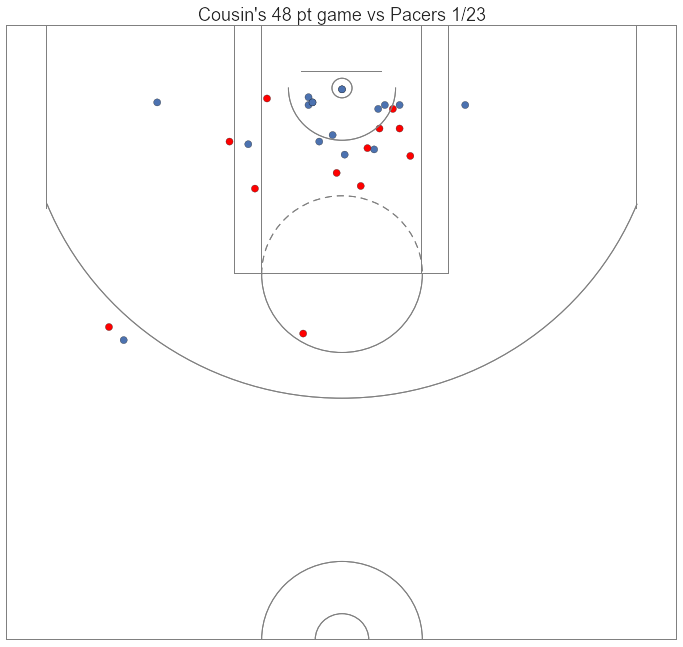

In [518]:
#Cousins 48 pt game 1/23/16 vs Pacers with color
nba.shot_chart(cousin_48_pts.LOC_X[(cousin_48_pts['SHOT_MADE_FLAG']==1)], cousin_48_pts.LOC_Y[(cousin_48_pts['SHOT_MADE_FLAG']==1)],
              title="Cousin's 48 pt game vs Pacers 1/23", s=50)

nba.shot_chart(cousin_48_pts.LOC_X[(cousin_48_pts['SHOT_MADE_FLAG']==0)], cousin_48_pts.LOC_Y[(cousin_48_pts['SHOT_MADE_FLAG']==0)],
              title="Cousin's 48 pt game vs Pacers 1/23", color="red", s=50)

plt.show()

In [519]:
shots = nba.Shots(player_id=cousin_id)
shots.update_params({'GAMEID':'0021500674'})
cousin_56_pts = shots.get_shots()

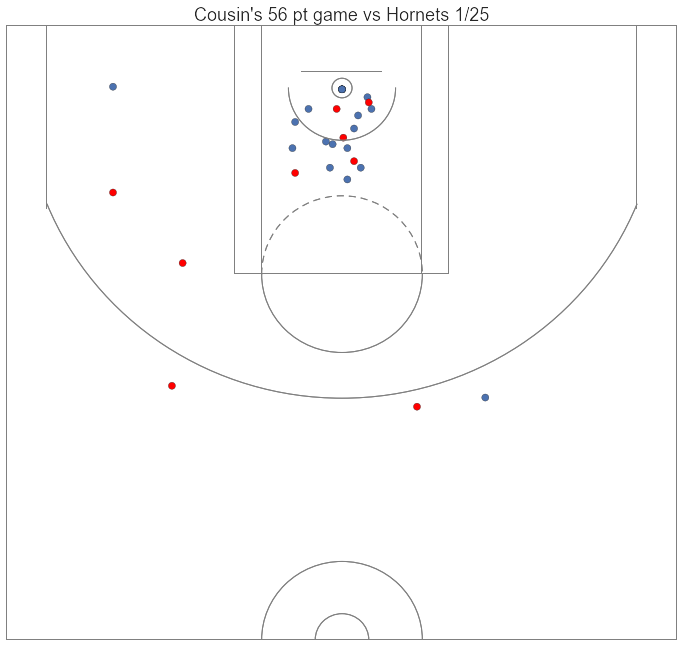

In [520]:
#Cousins 56 pt game 1/25/16 vs Hornets with color
nba.shot_chart(cousin_56_pts.LOC_X[(cousin_56_pts['SHOT_MADE_FLAG']==1)], cousin_56_pts.LOC_Y[(cousin_56_pts['SHOT_MADE_FLAG']==1)], s=50)

nba.shot_chart(cousin_56_pts.LOC_X[(cousin_56_pts['SHOT_MADE_FLAG']==0)], cousin_56_pts.LOC_Y[(cousin_56_pts['SHOT_MADE_FLAG']==0)],
              title="Cousin's 56 pt game vs Hornets 1/25", color="red", s=50)

plt.show()

In [521]:
jan_shots = nba.Shots(player_id=cousin_id)
jan_shots.update_params({'DateFrom':'01/01/16'})
jan_shots.update_params({'Dateto':'01/31/16'})
cousin_jan_shot = jan_shots.get_shots()

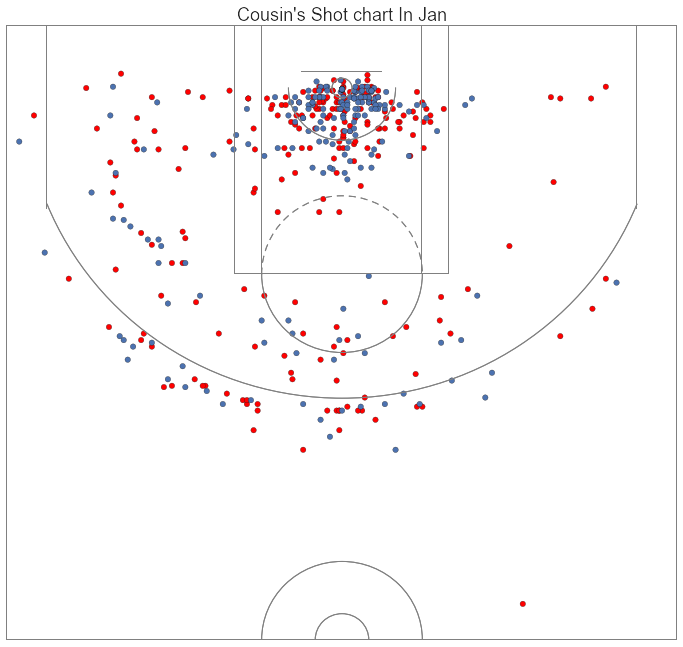

In [522]:
#Cousins 56 pt game 1/25/16 vs Hornets with color
nba.shot_chart(cousin_jan_shot.LOC_X[(cousin_jan_shot['SHOT_MADE_FLAG']==0)], cousin_jan_shot.LOC_Y[(cousin_jan_shot['SHOT_MADE_FLAG']==0)],
               s=30, color="red")

nba.shot_chart(cousin_jan_shot.LOC_X[(cousin_jan_shot['SHOT_MADE_FLAG']==1)], cousin_jan_shot.LOC_Y[(cousin_jan_shot['SHOT_MADE_FLAG']==1)],
              title="Cousin's Shot chart In Jan", s=30)

plt.show()